### DATA PPEPROCESSING

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel('customer_churn_large_dataset.xlsx')

In [3]:
df.sample(5)

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
44612,44613,Customer_44613,56,Male,Miami,24,48.39,399,1
72815,72816,Customer_72816,38,Male,Houston,12,92.47,305,1
35595,35596,Customer_35596,25,Male,Houston,2,93.39,55,0
6945,6946,Customer_6946,35,Female,Chicago,16,77.11,245,1
78779,78780,Customer_78780,67,Male,Miami,9,45.23,432,0


In [4]:
df = df.drop(columns =['CustomerID', 'Name'])

In [5]:
# NO MISSING DATA
df.isna().sum()

Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [6]:
# NO DUPLICATE VALUES
df.duplicated().sum()


0

In [7]:
# UNDERSTANDING DATA
df.describe()


,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,44.027020,12.490100,65.053197,274.393650,0.497790
std,15.280283,6.926461,20.230696,130.463063,0.499998
min,18.000000,1.000000,30.000000,50.000000,0.000000
25%,31.000000,6.000000,47.540000,161.000000,0.000000
50%,44.000000,12.000000,65.010000,274.000000,0.000000
75%,57.000000,19.000000,82.640000,387.000000,1.000000
max,70.000000,24.000000,100.000000,500.000000,1.000000


In [8]:
# INFO ON DATA TYPES
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         100000 non-null  int64  
 1   Gender                      100000 non-null  object 
 2   Location                    100000 non-null  object 
 3   Subscription_Length_Months  100000 non-null  int64  
 4   Monthly_Bill                100000 non-null  float64
 5   Total_Usage_GB              100000 non-null  int64  
 6   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 5.3+ MB


##OUTLIER DETECTION

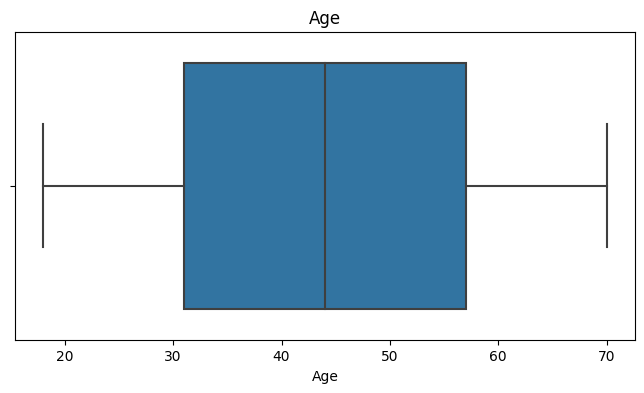

No outliers found in Age



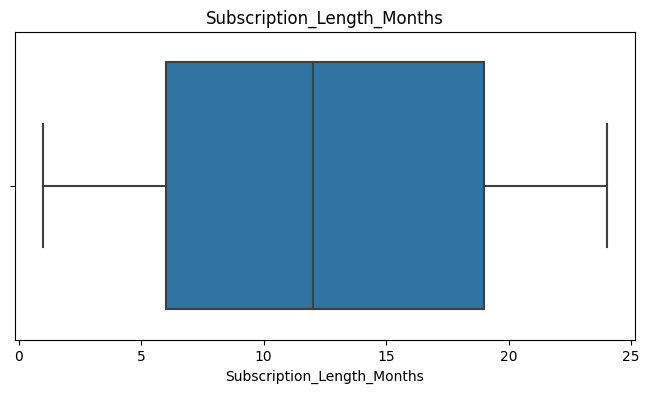

No outliers found in Subscription_Length_Months



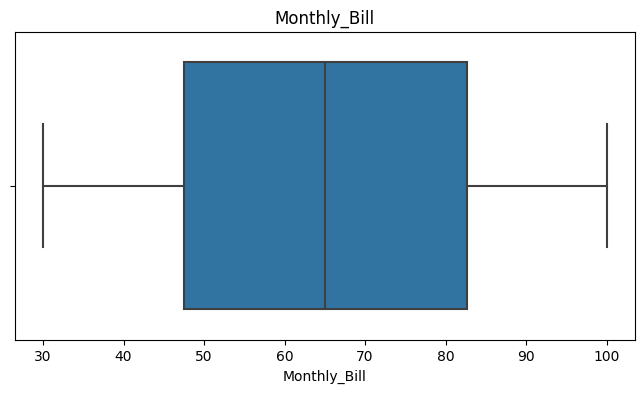

No outliers found in Monthly_Bill



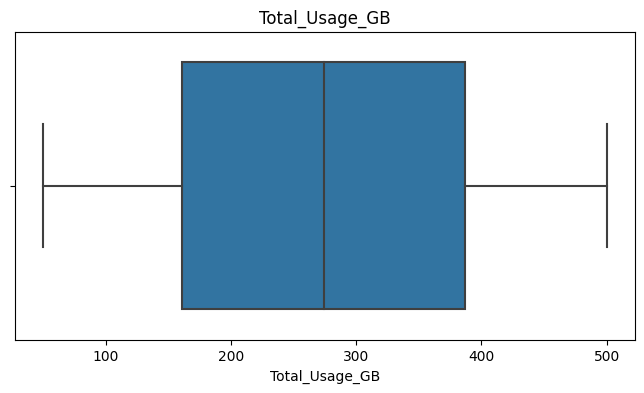

No outliers found in Total_Usage_GB



In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of features to check for outliers
features = ["Age", "Subscription_Length_Months", "Monthly_Bill", "Total_Usage_GB"]

for feature in features:
    # Creating a box plot
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[feature])
    plt.title(f'{feature}')
    plt.show()

    # Checking for outliers
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]

    if len(outliers) > 0:
        print(f"Number of outliers in {feature}: {len(outliers)}")
        print(f"Indices of outliers in {feature}:\n{outliers.index}\n")
    else:
        print(f"No outliers found in {feature}\n")


### UNDERSTANDING FEATURE CORRELATION WITH THE TARGET VARIABLE

In [10]:
import pandas as pd

features = ["Age", "Subscription_Length_Months", "Monthly_Bill", "Total_Usage_GB"]
target = "Churn"

correlation_results = {}

for feature in features:
    correlation = df[feature].corr(df[target])
    correlation_results[feature] = correlation

for feature, correlation in correlation_results.items():
    print(f"Correlation between {feature} and {target}: {correlation:.4f}")


Correlation between Age and Churn: 0.0016
Correlation between Subscription_Length_Months and Churn: 0.0023
Correlation between Monthly_Bill and Churn: -0.0002
Correlation between Total_Usage_GB and Churn: -0.0028


### VISUALIZATIONS 

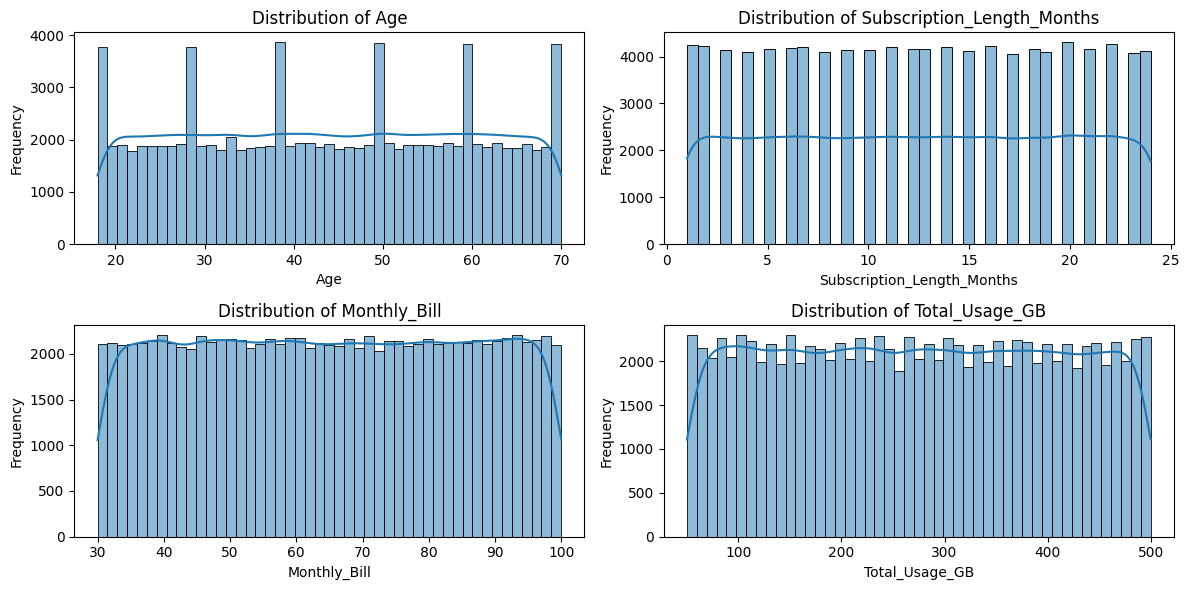

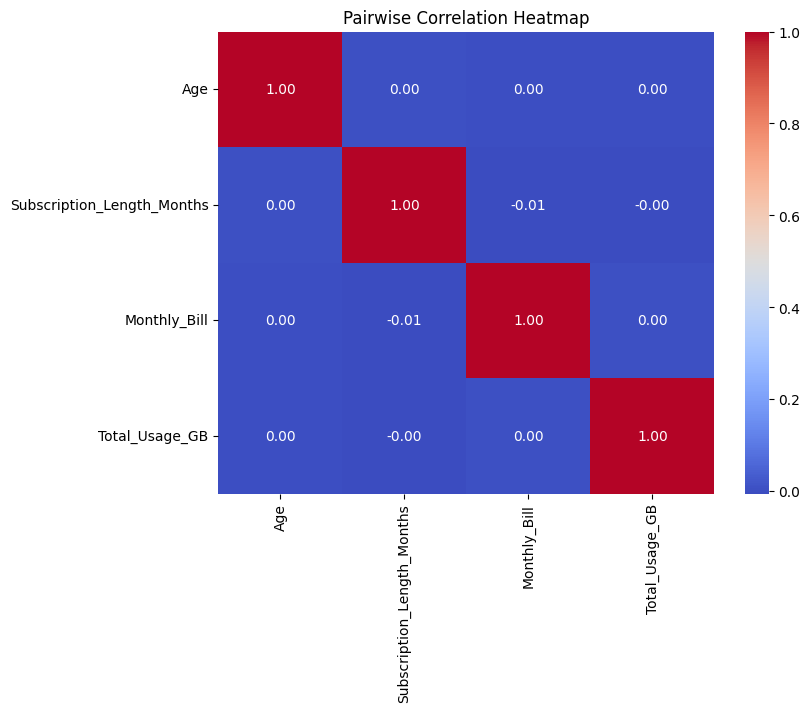

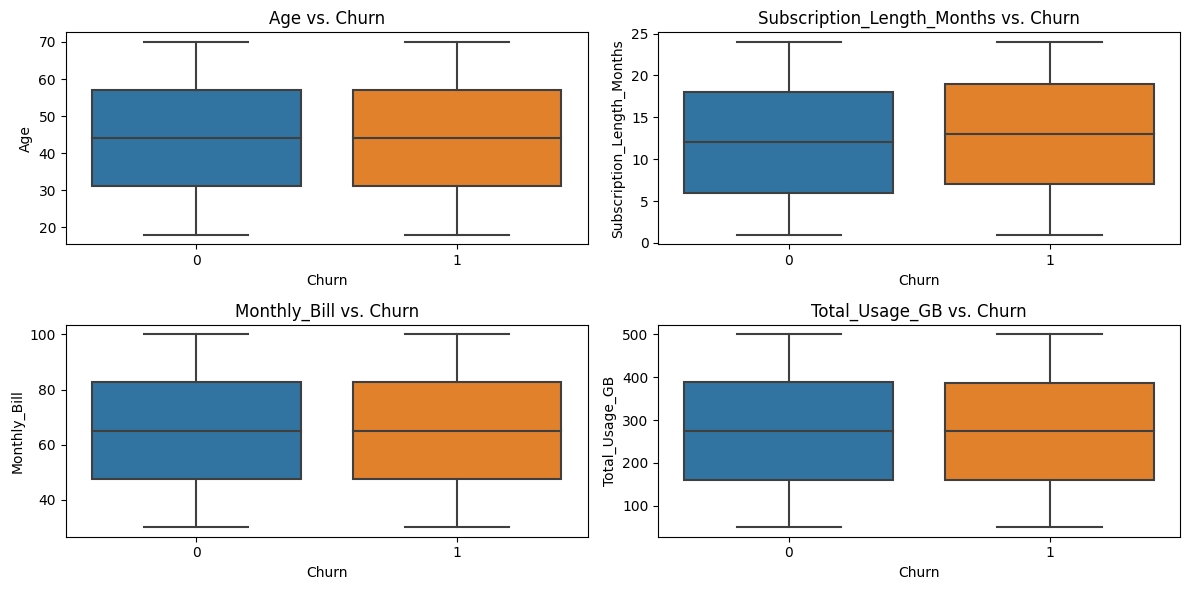

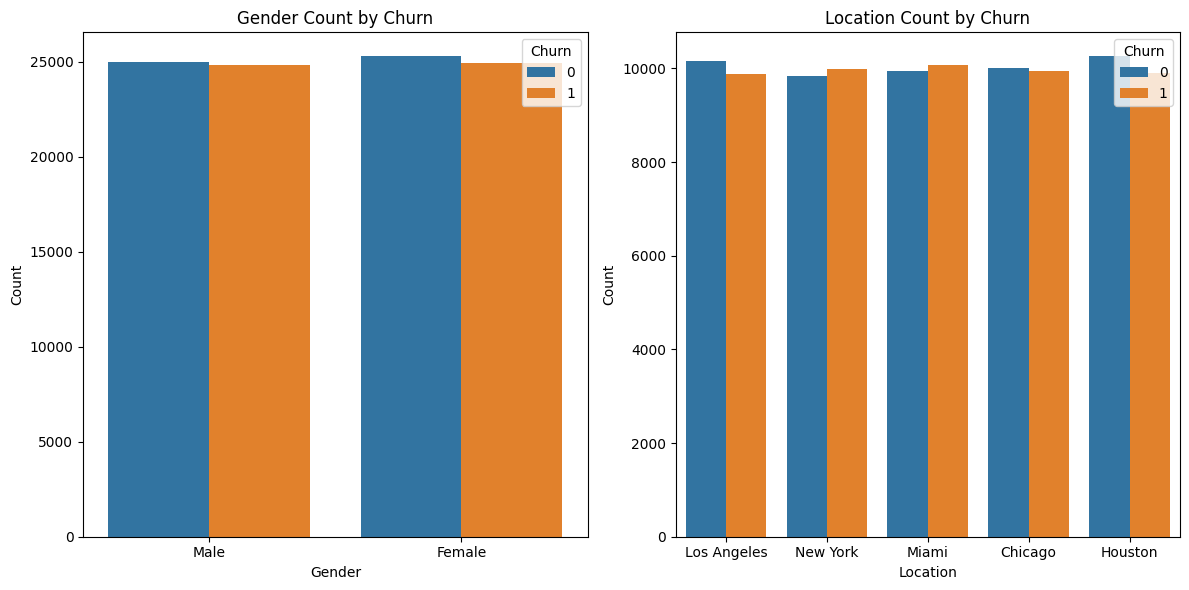

In [11]:
numeric_features = ["Age", "Subscription_Length_Months", "Monthly_Bill", "Total_Usage_GB"]
categorical_features = ["Gender", "Location"]

plt.figure(figsize=(12, 6))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Pairwise correlation heatmap
correlation_matrix = df[numeric_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Pairwise Correlation Heatmap")
plt.show()

# Box plots for numeric features vs. Churn
plt.figure(figsize=(12, 6))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x='Churn', y=feature)
    plt.title(f'{feature} vs. Churn')
    plt.xlabel('Churn')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

# Count plots for categorical features
plt.figure(figsize=(12, 6))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(1, 2, i)
    sns.countplot(data=df, x=feature, hue='Churn')
    plt.title(f'{feature} Count by Churn')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


## FEATURE ENGINEERING

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate
import xgboost as xgb
from sklearn.metrics import classification_report

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.2, random_state=42, shuffle=True)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80000, 6), (20000, 6), (80000,), (20000,))

In [14]:
numeric_transformer = Pipeline(steps=[
    ('MinMaxScaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop="first", sparse = False))
])

transformer = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],remainder = 'passthrough')

### MODEL BUILDING (using LogisticRegression,XGBClassifier and RandomForestClassifier)

In [15]:
# Define your classifiers (pipelines)
clf1 = Pipeline(steps=[
    ('preprocessing', transformer),
    ('classifier', LogisticRegression())
])

clf2 = Pipeline(steps=[
    ('preprocessing', transformer),
    ('classifier', xgb.XGBClassifier())
])

clf3 = Pipeline(steps=[
    ('preprocessing', transformer),
    ('classifier', RandomForestClassifier())
])

classifiers = {
    "Logistic Regression": clf1,
    "XGBClassifier": clf2,
    "RandomForestClassifier": clf3
}

for clf_name, clf in classifiers.items():
    
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    Accuracy = clf.score(X_test, y_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Classifier: {clf_name}")
    print(f"Accuracy Score: {Accuracy:.4f}")
    print(f"Precision Score: {precision:.4f}")
    print(f"Recall Score: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\n")


Classifier: Logistic Regression
Accuracy Score: 0.5037
Precision Score: 0.4997
Recall Score: 0.3789
F1 Score: 0.4310


Classifier: XGBClassifier
Accuracy Score: 0.5022
Precision Score: 0.4982
Recall Score: 0.4861
F1 Score: 0.4921


Classifier: RandomForestClassifier
Accuracy Score: 0.4954
Precision Score: 0.4910
Recall Score: 0.4711
F1 Score: 0.4809




## MODEL OPTIMIZATION

In [16]:
from sklearn.model_selection import GridSearchCV, cross_val_score

# Defining the parameter grid for hyperparameter tuning
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [3, 4, 5],                
    'classifier__learning_rate': [0.1, 0.01, 0.001]    
}

grid_search = GridSearchCV(clf2, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_estimator = grid_search.best_estimator_

cross_val_scores = cross_val_score(best_estimator, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", cross_val_scores)

best_estimator.fit(X_train, y_train)

y_pred = best_estimator.predict(X_test)

accuracy = best_estimator.score(X_test, y_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Best Estimator: XGBClassifier")
print(f"Accuracy Score: {accuracy:.4f}")
print(f"Precision Score: {precision:.4f}")
print(f"Recall Score: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")



Best Hyperparameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 300}
Cross-Validation Scores: [0.501     0.49875   0.503625  0.503875  0.5089375]
Best Estimator: XGBClassifier
Accuracy Score: 0.4998
Precision Score: 0.4957
Recall Score: 0.4772
F1 Score: 0.4862


## MODEL DEPLOYMENT

In [17]:
# Deploying the model using `pickle` module
import pickle

pickle.dump(clf2, open("model.pkl", 'wb'))